### Problem Statment

`Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.`

In [1]:
# import nedded libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset into pandas dataframe
df=pd.read_csv('data/loan_data.csv')
# show 10 random samples of data
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
258,LP001859,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural,N
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
76,LP001256,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,N
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,NaN,Rural,Y
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
556,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban,Y
160,LP001560,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y


### Data Describtion

`Loan_ID >>> Unique Loan ID`

`Gender >>> Male/ Female`

`Married >>> Applicant married (Y/N)`

`Dependents >>> Number of dependents`

`Education >>> Applicant Education (Graduate/ Under Graduate)`

`Self_Employed >>> Self employed (Y/N)`

`ApplicantIncome >>> Applicant income`

`CoapplicantIncome >>> Coapplicant income`

`LoanAmount >>> Loan amount in thousands`

`Loan_Amount_Term >>> Term of loan in months`

`Credit_History >>> credit history meets guidelines (credibility of the applicant extracted from various sources)`

`Property_Area >>> Urban/ Semi Urban/ Rural`

`Loan_Status >>> Loan approved (Y/N)`

In [3]:
# knowing more about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# describe numerical features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Cleaning & Transformation

In [5]:
# the challenge in this data , that features are mix between categorical and numerical
# 1-handle missing categorical values
# simple techique can be used to handle missing categorical features , is by replacing nan in column with most frequent value n the column
cat_features=['Gender','Married','Dependents','Education','Self_Employed',
                 'Property_Area','Loan_Status','Credit_History']
for column in cat_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# check results
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# 2-handle missing numerical values
# also simple technique may bes used is to replace nans in numerical columns with column average
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

# check again for nans
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# another idea is to sum applicant incpme and coapplicant income in one feature 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1,inplace=True)
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
254,Male,No,0,Graduate,Yes,192.0,360.0,0.0,Urban,N,16250.0
558,Male,Yes,0,Graduate,No,162.0,360.0,1.0,Semiurban,Y,6556.0
252,Male,No,0,Not Graduate,Yes,104.0,360.0,1.0,Rural,Y,4750.0
189,Male,Yes,0,Graduate,No,188.0,180.0,1.0,Rural,Y,9328.0
497,Male,Yes,0,Graduate,No,111.0,12.0,1.0,Urban,Y,7482.0


### Features Distribution Analysis

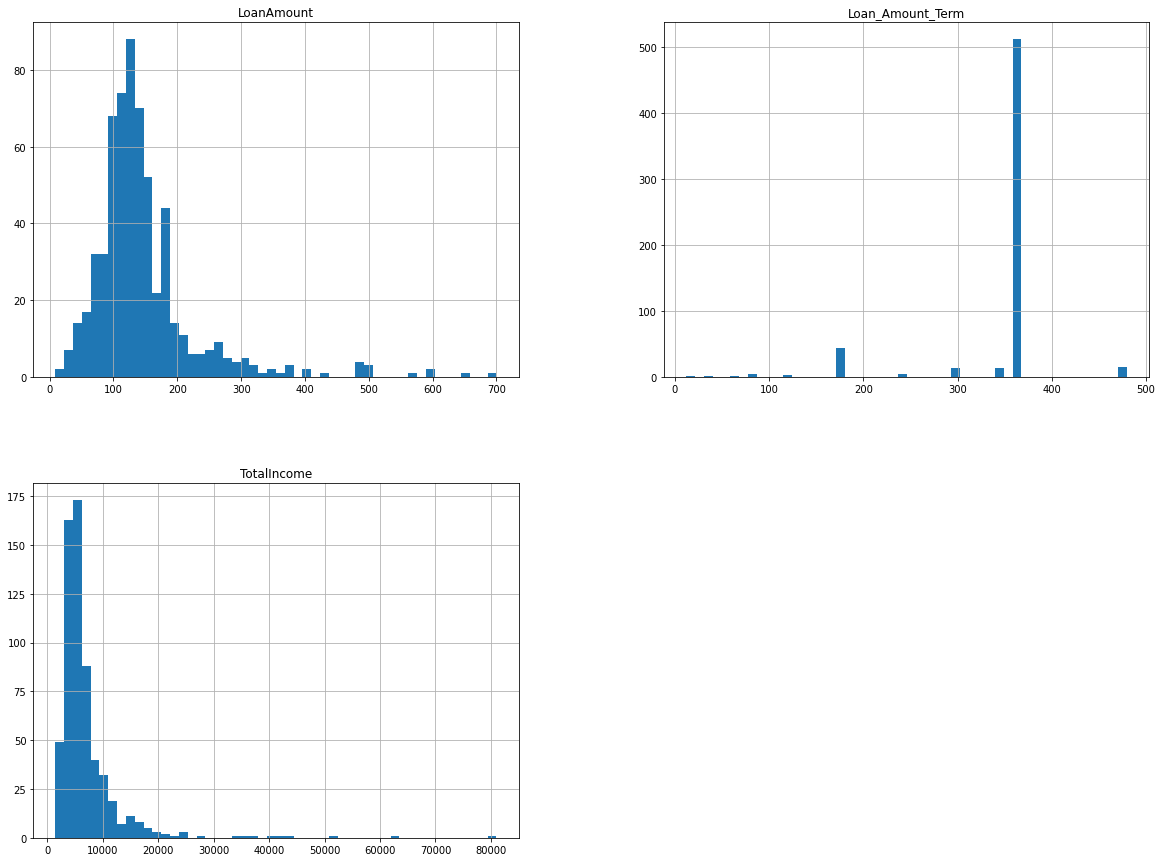

In [8]:
# first we plot histogram of numerical fatures
num_features=df[['TotalIncome','LoanAmount','Loan_Amount_Term']]
num_features.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
# we note that numerical features with outliers
#  Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs.
# So instead of treating them as outliers, let’s try a log transformation to nullify their effect and solve skweness problem

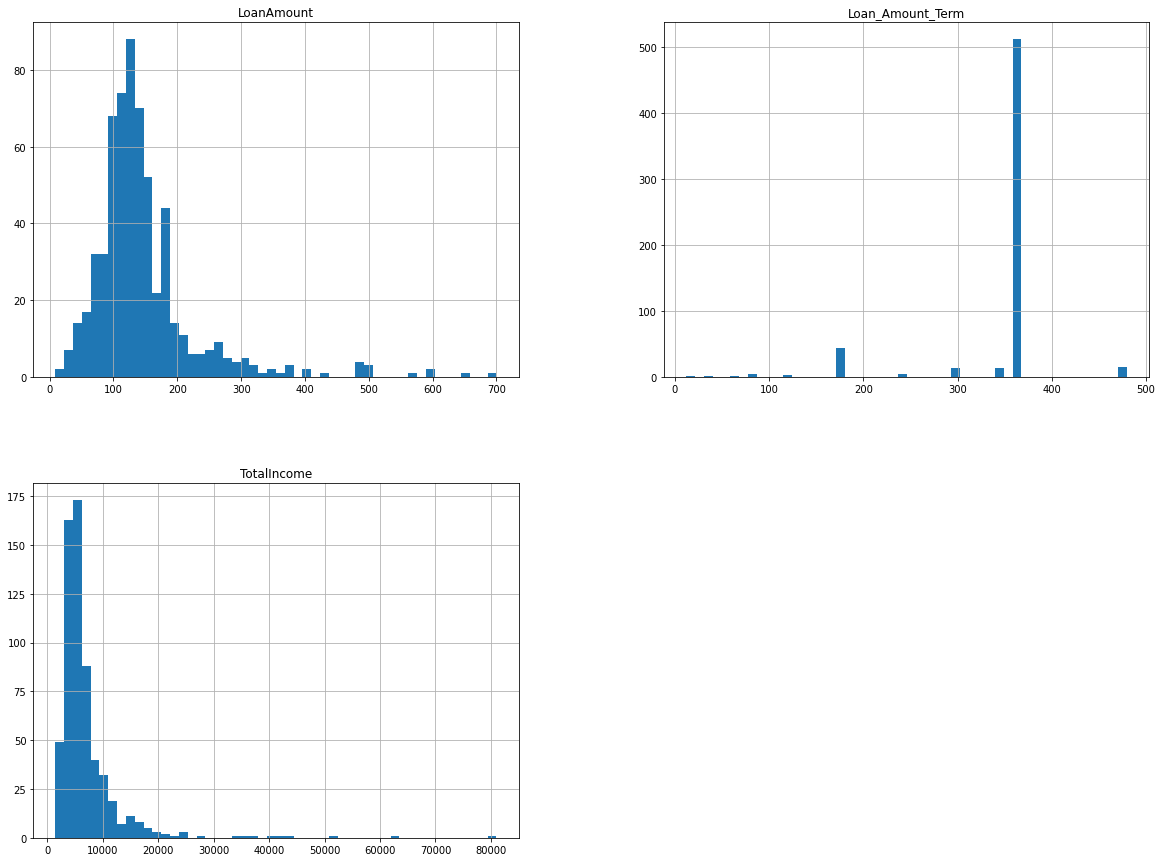

In [10]:
df[['TotalIncome','LoanAmount','Loan_Amount_Term']]=np.log(num_features) # log transformation and save in original dataframe
# plot again to see effect of log transform
num_features.hist(bins=50,figsize=(20,15))
plt.show()

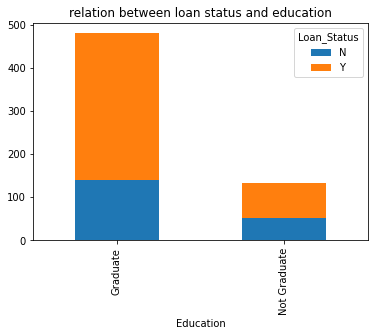

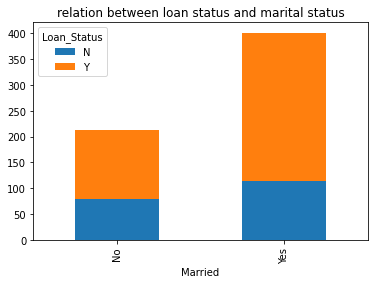

In [11]:
# now we may analyze categorical features
# q1 >> what is the relation between loan status and education
pd.crosstab(df['Education'], df['Loan_Status']).plot(kind='bar', stacked=True,title='relation between loan status and education')
# q2 >> what is the relation between loan status and marital status
pd.crosstab(df['Married'], df['Loan_Status']).plot(kind='bar', stacked=True,title='relation between loan status and marital status')

In [12]:
# now we need to scale numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['TotalIncome','LoanAmount','Loan_Amount_Term']]=scaler.fit_transform(df[['TotalIncome','LoanAmount','Loan_Amount_Term']])# scale numerical features

In [13]:
# also we need to one hot encode all categorical features
label=df['Loan_Status']
df.drop(['Loan_Status'],inplace=True,axis=1)
df=pd.get_dummies(df)
df.sample(10)

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
363,0.541279,0.872589,1.0,0.355814,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
329,0.461078,0.922014,1.0,0.136594,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
194,0.594936,0.922014,1.0,0.264845,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
598,0.688064,0.922014,1.0,0.479803,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0
220,0.435733,0.922014,0.0,0.107220,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
98,0.585161,0.734112,1.0,0.264668,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0
270,0.276530,0.922014,1.0,0.200728,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
12,0.712264,0.922014,1.0,0.508390,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
199,0.510264,0.922014,1.0,0.504383,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1
481,0.581132,0.922014,1.0,0.189592,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0


### Model Training

In [14]:
# we will choose SVM to learn more about how to use it sklearn
from sklearn.svm import SVC #import svm as classifier
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(df,label,test_size=0.2)

In [15]:
# train model
svm = SVC()
svm.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Model Evaluation

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = svm.predict(xtest) # test model against test set
print("Model Acurracy = {}".format(accuracy_score(ytest, predictions))) # print accuracy

Model Acurracy = 0.8292682926829268


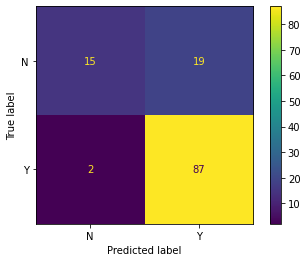

In [21]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, xtest, ytest)
plt.show()

In [ ]:
# notes:
# 1- trainees should try to apply any feature reduction technique for example(feature importance) to reduce features
# 2- trainees should try to run another classifier for example (logistic regression)

In [ ]:
# assignment : https://www.kaggle.com/uciml/iris